In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('/content/World Happiness Report 2020.csv')
df.head()

Happiness score  GDP per capita  Social support  Healthy life expectancy  \
0           7.8087       10.639267        0.954330                71.900825   
1           7.6456       10.774001        0.955991                72.402504   
2           7.5599       10.979933        0.942847                74.102448   
3           7.5045       10.772559        0.974670                73.000000   
4           7.4880       11.087804        0.952487                73.200783   

   Freedom to make life choices  Generosity  Perceptions of corruption  
0                      0.949172   -0.059482                   0.195445  
1                      0.951444    0.066202                   0.168489  
2                      0.921337    0.105911                   0.303728  
3                      0.948892    0.246944                   0.711710  
4                      0.955750    0.134533                   0.263218

In [4]:
df.isnull().sum()

Happiness score                 0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [5]:
df['Perceptions of corruption']=df['Perceptions of corruption'].fillna(df['Perceptions of corruption'].mean())

In [6]:
x=df.drop(['Happiness score'],axis=1)
x.head()

GDP per capita  Social support  Healthy life expectancy  \
0       10.639267        0.954330                71.900825   
1       10.774001        0.955991                72.402504   
2       10.979933        0.942847                74.102448   
3       10.772559        0.974670                73.000000   
4       11.087804        0.952487                73.200783   

   Freedom to make life choices  Generosity  Perceptions of corruption  
0                      0.949172   -0.059482                   0.195445  
1                      0.951444    0.066202                   0.168489  
2                      0.921337    0.105911                   0.303728  
3                      0.948892    0.246944                   0.711710  
4                      0.955750    0.134533                   0.263218

In [7]:
y=df['Happiness score']

In [8]:
x.isnull().sum()

GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [9]:
x.describe()

GDP per capita  Social support  Healthy life expectancy  \
count      153.000000      153.000000               153.000000   
mean         9.295706        0.808721                64.445529   
std          1.201588        0.121453                 7.057848   
min          6.492642        0.319460                45.200001   
25%          8.350645        0.737217                58.961712   
50%          9.456313        0.829204                66.305145   
75%         10.265124        0.906747                69.289192   
max         11.450681        0.974670                76.804581   

       Freedom to make life choices  Generosity  Perceptions of corruption  
count                    153.000000  153.000000                 153.000000  
mean                       0.783360   -0.014568                   0.733120  
std                        0.117786    0.151809                   0.175172  
min                        0.396573   -0.300907                   0.109784  
25%                        0.714839   -0.127015                   0.683019  
50%                        0.799805   -0.033665                   0.783122  
75%                        0.877709    0.085429                   0.849151  
max                        0.974998    0.560664                   0.935585

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=42)

In [11]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100,random_state=1)
rfr.fit(xtrain,ytrain)

RandomForestRegressor(random_state=1)

In [12]:
rfr.score(xtrain,ytrain)

0.9670376227380691

In [13]:
rfr_pred=rfr.predict(xtest)

In [14]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,rfr_pred)

0.26469430559307694

In [15]:
mean_squared_error(ytest,rfr_pred,squared=False)

0.5144845047162032

In [16]:
from sklearn.metrics import r2_score
r2_score(ytest,rfr_pred)

0.6703289972346693

In [17]:
!pip install shap
import shap
shap.initjs()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 9.5 MB/s eta 0:00:00


In [18]:
def model_predict(x):
    return rfr.predict(x)

In [19]:
explainer = shap.KernelExplainer(model_predict,x)
shap_values = explainer(x)

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


  0%|          | 0/153 [00:00<?, ?it/s]

X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fit

In [20]:
len(shap_values)

153

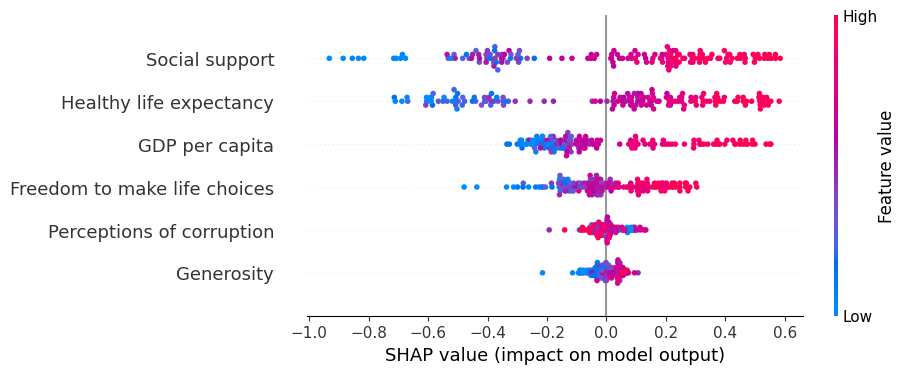

In [21]:
shap.plots.beeswarm(shap_values)

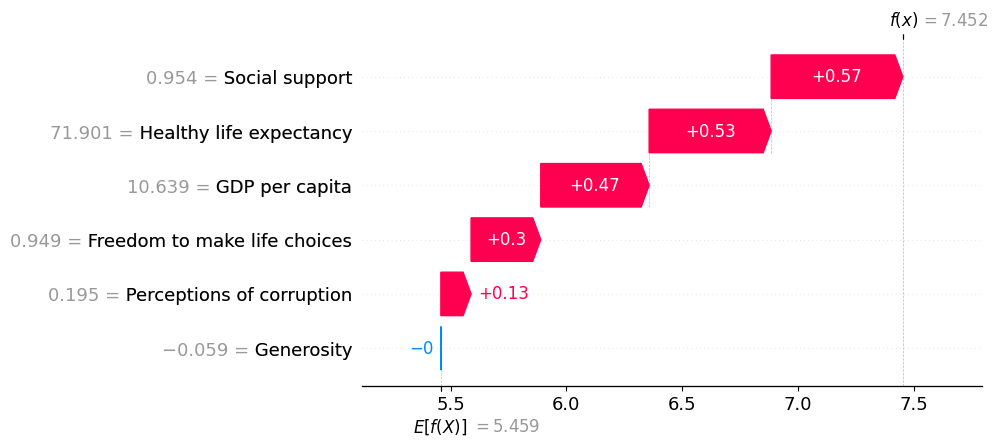

In [22]:
shap.plots.waterfall(shap_values[0])

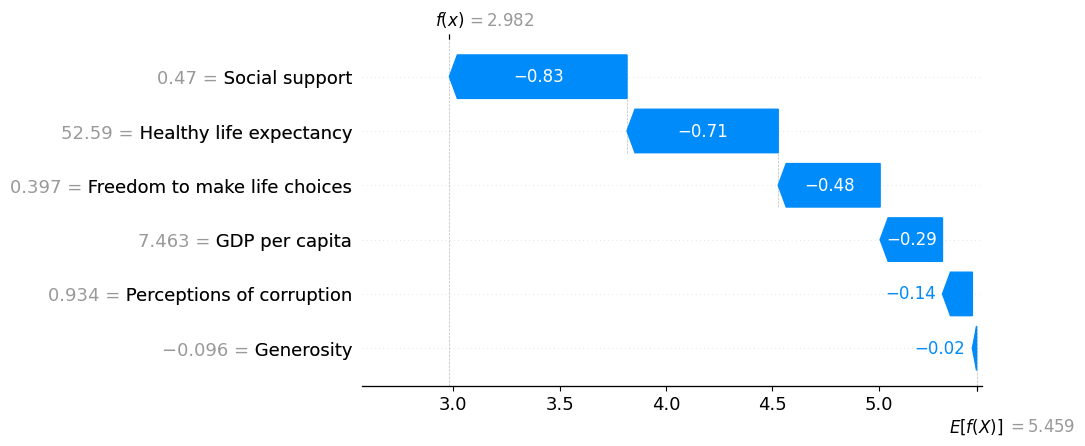

In [24]:
shap.plots.waterfall(shap_values[152])

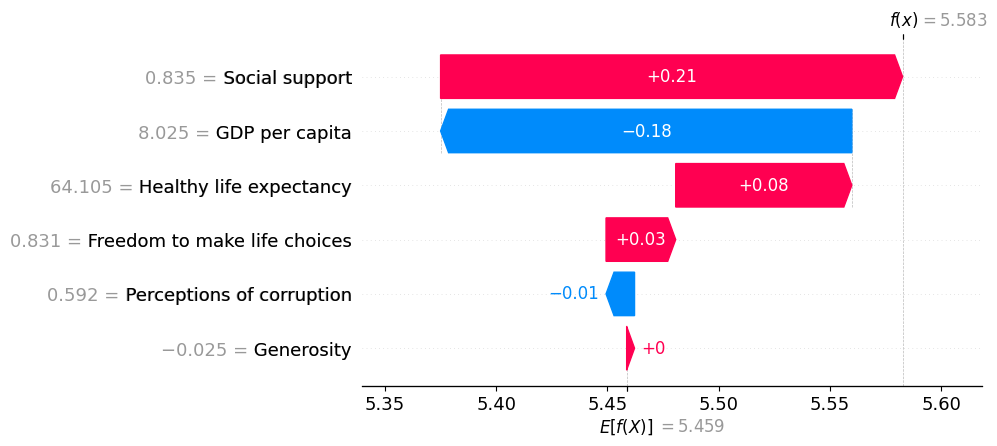

In [25]:
shap.plots.waterfall(shap_values[70])

In [26]:
shap.initjs()
shap.plots.force(shap_values[0])

In [27]:
shap.initjs()
shap.plots.force(shap_values[145])

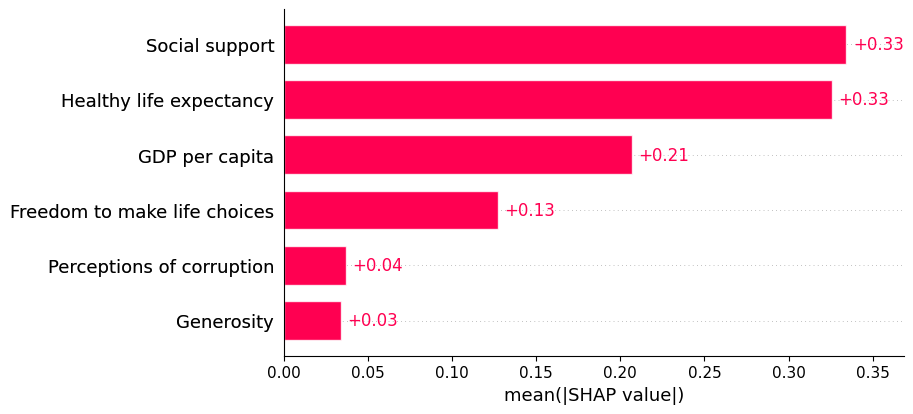

In [28]:
shap.plots.bar(shap_values)

In [29]:
!pip install shapash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.1/653.1 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.2/221.2 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 44.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.8 MB/s eta 0:00:00
  Created wheel for dash-renderer: filename=dash_renderer-1.8.3-py3-none-any.whl size=1013920 sha256=6729371e8f44d3db334548c72b477c764a8075e4db6e219e0cee163e2b4f666b
  Stored in directory: /root/.cache/pip/wheels/6c/04/c8/22a0b5a26c3ecb61e17a27d4bbe7fad32d1417bbdbd4d46acf
  Created wheel for dash-daq: filename=dash_daq-0.5.0-py3-none-any.whl size=669691 sha256=4142d97f58d186fdad05567e6f450fc38d6e45c17f00465ea7c1262adee8290f


In [30]:
from shapash.explainer.smart_explainer import SmartExplainer
xpl = SmartExplainer(
    model=rfr)

In [31]:
y_pred = pd.DataFrame(rfr.predict(xtest),columns=['pred'],index=xtest.index)

In [32]:
xpl.compile(x=xtest,y_pred=y_pred)

INFO: Shap explainer type - <shap.explainers._tree.TreeExplainer object at 0x7d224e00a620>


In [33]:
xpl.plot.features_importance()

In [34]:
xpl.plot.contribution_plot("GDP per capita")

In [35]:
xpl.plot.contribution_plot("Social support")

In [36]:
ytest

84     5.2333
86     5.1976
97     5.0849
115    4.6768
29     6.3874
114    4.7241
78     5.5047
81     5.3843
18     6.9109
15     7.0937
19     6.8635
12     7.1645
9      7.2375
42     6.1863
51     6.0060
69     5.6075
109    4.7848
136    4.1656
65     5.6933
96     5.0948
75     5.5355
123    4.5579
31     6.3756
66     5.6921
55     5.9532
30     6.3771
26     6.4065
131    4.3081
135    4.1862
36     6.2806
113    4.7293
Name: Happiness score, dtype: float64

In [37]:
xpl.plot.local_plot(index=9)

In [38]:
xpl.plot.local_plot(index=147)

In [39]:
!pip install lime
import lime
import lime.lime_tabular

# LIME has one explainer for all the models
explainer = lime.lime_tabular.LimeTabularExplainer(x.values, feature_names=x.columns.values.tolist(),
                                                  class_names=['Happiness score'], verbose=True, mode='regression')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=3d829699a568e37c18d39e229c8c294f7e8ce79e51677a56d58e29ceb48c3eaa
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [40]:
j = 1
exp = explainer.explain_instance(x.values[j], rfr.predict, num_features=6)
exp.show_in_notebook(show_table=True)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



Intercept 4.810855723082663
Prediction_local [6.76255]
Right: 7.600720882360012


In [41]:
exp = explainer.explain_instance(x.values[145], rfr.predict, num_features=6)
exp.show_in_notebook(show_table=True)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



Intercept 5.692361596987042
Prediction_local [4.10157317]
Right: 4.047846026609997


In [42]:
!pip install eli5
import eli5

columns_ = ['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']

eli5.show_weights(rfr, feature_names=columns_)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=69f9956310d61b35f54bec8990ae97e64fe81ffa5acf2a876c202f8d302b0a66
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
